# Superstore EDA Final
by Marta Aranda


## About this Data Set

### Summary

Sales data from a fictional office supplies company, covering orders, customers, products, and financials over multiple years.

**Data Source**
* Global_Superstore_Orders_2012_2015-2.xlsx

**Description**
* he Superstore dataset is a sample dataset commonly used for data analysis and visualization practice. It includes data on orders, customers, products, and financial metrics such as sales, profit, and shipping costs.

* The dataset is widely used in tools like Tableau and Power BI for exploring data trends and building dashboards. It provides valuable insights into sales performance, product profitability, and customer behavior.

**File**
* Global_Superstore_Orders_2012_2015-2.xlsx:

1.   Orders: 24 columns, ~51292 rows
2.   People: 2 columns, 25 rows



## Data Dictionary
* Orders sheet
1. Row ID: (Integer)	Unique identifier for each row in the dataset.
2. Order ID:(String)	Unique identifier for each order.
3. Order Date:(Date)	Date when the order was placed.
4. Ship Date:(Date)	Date when the order was shipped.
5. Ship Mode:(String)	Shipping method used for the order (e.g., Standard Class, Second Class).
6. Customer ID:(String)	Unique identifier for the customer placing the order.
7. Customer Name:(String)	Full name of the customer.
8. Segment:(String)	Customer segment (e.g., Consumer, Corporate, Home Office).
9. Postal Code:(Integer)	Postal code of the customer's location.
10. City:(String)	City where the order was placed.
11. State:(String) State where the order was placed.
12. Country:(String) Country where the order was placed.
13. Region:(String)	Region where the order was placed (e.g., West, East).
14. Product ID:(String)	Unique identifier for the product.
15. Category:(String)	Product category (e.g., Furniture, Office Supplies, Technology).
16. Sub-Category:(String)	Product sub-category (e.g., Chairs, Tables, Phones).
17. Product Name:(String) Full name of the product.
18. Sales:(Float)	Sales value of the order.
19. Quantity:(Integer)	Number of units ordered.
20. Discount:(Float)	Discount applied to the order (as a percentage).
21. Profit:(Float)	Profit earned from the order.
22. Shipping Cost:(Float)	Cost of shipping the order.
23. Order Priority:(String)	Priority level of the order (e.g., High, Medium, Low).

* People sheet
1. Person:(String) Name of the person responsible for the order or sales region.
2. Region: (String) Sales region assigned to the person (e.g., West, East, Central).

# Import Libraries and Set Notebook Defaults

In [1]:
import pandas as pd

In [2]:
# Display all dataframe columns
pd.set_option('display.max_columns', None)

# Set Pandas to display numbers without scientific notation, and with 2 decimals
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Read Excel, and Prep Data

In [4]:
# ORIGINAL read from excel
#df = pd.read_excel('/content/drive/MyDrive/Descriptive Analytics/Superstore EDA/data/Copy of Global_Superstore_Orders_2012_2015-2.xlsx')
# df.head()

In [5]:
df = pd.read_excel('/content/drive/MyDrive/Descriptive Analytics/Superstore EDA/data/Copy of Global_Superstore_Orders_2012_2015-2.xlsx')

## Examine __`Postal Code`__ Nulls and Data Type

In [6]:
# View location fields sorted by postal code
columns = ['Country', 'State', 'City', 'Postal Code']
df[columns].sort_values('Postal Code').head(30)

,Country,State,City,Postal Code
13405,United States,Massachusetts,Holyoke,"1,040.00"
9922,United States,Massachusetts,Leominster,"1,453.00"
9923,United States,Massachusetts,Leominster,"1,453.00"
18444,United States,Massachusetts,Leominster,"1,453.00"
18442,United States,Massachusetts,Leominster,"1,453.00"
18445,United States,Massachusetts,Leominster,"1,453.00"
18443,United States,Massachusetts,Leominster,"1,453.00"
28718,United States,Massachusetts,Marlborough,"1,752.00"
28717,United States,Massachusetts,Marlborough,"1,752.00"
21494,United States,Massachusetts,Andover,"1,810.00"


In [7]:
# View location columns for records where Postal Code in Null
columns = ['Country', 'State', 'City', 'Postal Code']

mask = df['Postal Code'].isnull()

df[columns][mask].head(20)

,Country,State,City,Postal Code
0,Algeria,Constantine,Constantine,NaN
1,Australia,New South Wales,Wagga Wagga,NaN
2,Hungary,Budapest,Budapest,NaN
3,Sweden,Stockholm,Stockholm,NaN
4,Australia,New South Wales,Wagga Wagga,NaN
5,Australia,New South Wales,Wagga Wagga,NaN
6,Canada,Ontario,St. Catharines,NaN
7,Australia,New South Wales,Sydney,NaN
8,New Zealand,Auckland,Papakura,NaN
9,Iraq,Ninawa,Mosul,NaN


In [8]:
# View location columns for records where Postal Code is NOT Null
colunms = ['Country', 'State', 'City', 'Postal Code']

mask = df['Postal Code'].notnull()

df[columns].loc[mask].sort_values('Country').head(20)
#df[columns].loc[mask].sort_values('Country').tail(20)

,Country,State,City,Postal Code
29,United States,Texas,Houston,"77,095.00"
33669,United States,California,Sacramento,"95,823.00"
33678,United States,Illinois,Aurora,"60,505.00"
33679,United States,Oregon,Springfield,"97,477.00"
33681,United States,Florida,Miami,"33,178.00"
33682,United States,Florida,Miami,"33,178.00"
33685,United States,Tennessee,Bristol,"37,620.00"
33686,United States,Tennessee,Bristol,"37,620.00"
33690,United States,California,Los Angeles,"90,045.00"
33698,United States,Wisconsin,Milwaukee,"53,209.00"


In [9]:
# Re-Read the original data into a new dataframe
# Specify the object data type for Postal Code
df1 = pd.read_excel('/content/drive/MyDrive/Descriptive Analytics/Superstore EDA/data/Copy of Global_Superstore_Orders_2012_2015-2.xlsx', dtype={'Postal Code': object})
df1.sample(30)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
34553,38518,US-2015-TG21310140-42032,2015-01-28,2015-02-01,Standard Class,TG-213101406,Toby Gnade,Consumer,10035,New York City,New York,United States,Eastern US,USCA,TEC-PH-4901,Technology,Phones,Jensen SMPS-640 - speaker phone,137.94,3,0.00,35.86,11.04,Medium
6984,1933,MX-2012-MO1750016-41222,2012-11-09,2012-11-14,Standard Class,MO-1750016,Mary O'Rourke,Consumer,NaN,Sucre,Chuquisaca,Bolivia,South America,LATAM,FUR-BO-3906,Furniture,Bookcases,"Dania Stackable Bookrack, Pine",248.22,3,0.00,86.82,33.76,High
30136,13919,ES-2014-KH16330139-41933,2014-10-21,2014-10-24,First Class,KH-16330139,Katharine Harms,Corporate,NaN,Liverpool,England,United Kingdom,Northern Europe,Europe,TEC-MA-5508,Technology,Machines,"Okidata Phone, White",426.30,5,0.00,4.20,93.34,High
12407,29881,ID-2013-JB1604559-41433,2013-06-08,2013-06-12,Standard Class,JB-1604559,Julia Barnett,Home Office,NaN,Jakarta,Jakarta,Indonesia,Southeastern Asia,Asia Pacific,OFF-ST-4096,Office Supplies,Storage,"Eldon Shelving, Single Width",40.21,1,0.17,-5.84,7.08,High
50231,30997,ID-2015-RP1939092-42354,2015-12-16,2015-12-21,Second Class,RP-1939092,Resi Pölking,Consumer,NaN,Manukau City,Auckland,New Zealand,Oceania,Asia Pacific,TEC-PH-5837,Technology,Phones,"Samsung Signal Booster, VoIP",164.02,2,0.40,-95.72,12.61,Medium
127,32163,CA-2012-AJ10780140-40919,2012-01-11,2012-01-16,Standard Class,AJ-107801408,Anthony Jacobs,Corporate,22153,Springfield,Virginia,United States,Southern US,USCA,FUR-FU-4755,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.94,1,0.00,21.30,3.52,Medium
3183,438,US-2012-CK123255-41081,2012-06-21,2012-06-27,Standard Class,CK-123255,Christine Kargatis,Home Office,NaN,Buenos Aires,Buenos Aires,Argentina,South America,LATAM,OFF-BI-2918,Office Supplies,Binders,"Acco Index Tab, Durable",1.79,1,0.70,-2.87,1.08,Medium
29065,1954,MX-2014-LH1675082-41906,2014-09-24,2014-09-28,Standard Class,LH-1675082,Larry Hughes,Consumer,NaN,Zapopan,Jalisco,Mexico,Central America,LATAM,TEC-AC-5896,Technology,Accessories,"SanDisk Router, Programmable",515.70,3,0.00,159.84,18.25,High
8170,19978,IT-2012-DL1286564-41255,2012-12-12,2012-12-15,Second Class,DL-1286564,Dan Lawera,Consumer,NaN,Turin,Piedmont,Italy,Southern Europe,Europe,FUR-CH-5803,Furniture,Chairs,"SAFCO Steel Folding Chair, Set of Two",211.10,6,0.60,-89.86,21.76,Medium
48020,40012,CA-2015-BM11650140-42325,2015-11-17,2015-11-21,Second Class,BM-116501406,Brian Moss,Corporate,44035,Elyria,Ohio,United States,Eastern US,USCA,OFF-BI-5645,Office Supplies,Binders,Prestige Round Ring Binders,1.82,1,0.70,-1.40,1.29,High


In [10]:
# NEW read from Excel
path = '/content/drive/MyDrive/Descriptive Analytics/Superstore EDA/data/Copy of Global_Superstore_Orders_2012_2015-2.xlsx'
df = pd.read_excel(path, dtype={'Postal Code': object})
df['Postal Code'] = df['Postal Code'].astype('str').str.zfill(5)
df['Postal Code'] = df['Postal Code'].replace('00nan', 'na')

df.sample(30)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
3085,34803,CA-2012-SC20020140-41079,2012-06-19,2012-06-23,Standard Class,SC-200201402,Sam Craven,Consumer,75023,Plano,Texas,United States,Central US,USCA,OFF-BI-6210,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,3.39,4,0.80,-5.09,1.37,High
36173,2294,US-2015-KT1646554-42084,2015-03-21,2015-03-25,Standard Class,KT-1646554,Kean Takahito,Consumer,na,Carrefour,Ouest,Haiti,Caribbean,LATAM,OFF-BI-2897,Office Supplies,Binders,"Acco Binder, Economy",84.84,14,0.40,-14.28,5.30,Medium
47112,28155,IN-2015-CM1183027-42312,2015-11-04,2015-11-08,Standard Class,CM-1183027,Cari MacIntyre,Corporate,na,Mianyang,Sichuan,China,Eastern Asia,Asia Pacific,TEC-PH-3802,Technology,Phones,"Cisco Signal Booster, VoIP",303.84,2,0.00,103.26,33.69,High
37938,19863,ES-2015-TS2108564-42133,2015-05-09,2015-05-13,Standard Class,TS-2108564,Thais Sissman,Consumer,na,Pisa,Tuscany,Italy,Southern Europe,Europe,OFF-LA-4536,Office Supplies,Labels,"Harbour Creations File Folder Labels, Laser Pr...",78.57,9,0.00,24.30,9.88,High
2717,3952,MX-2012-BD1160593-41066,2012-06-06,2012-06-11,Standard Class,BD-1160593,Brian Dahlen,Consumer,na,Tipitapa,Managua,Nicaragua,Central America,LATAM,OFF-SU-6178,Office Supplies,Supplies,"Stiletto Shears, Serrated",149.30,5,0.00,25.30,3.92,Medium
50424,39034,CA-2015-AG10330140-42357,2015-12-19,2015-12-21,First Class,AG-103301408,Alex Grayson,Consumer,28205,Charlotte,North Carolina,United States,Southern US,USCA,OFF-AR-5287,Office Supplies,Art,Newell 310,12.67,9,0.20,1.43,2.35,Medium
44386,6678,MX-2015-SG2060551-42263,2015-09-16,2015-09-20,Second Class,SG-2060551,Speros Goranitis,Consumer,na,Huehuetenango,Huehuetenango,Guatemala,Central America,LATAM,TEC-AC-5116,Technology,Accessories,"Logitech Keyboard, Erganomic",140.52,3,0.00,2.76,5.73,Medium
23344,12219,IT-2014-SH1997545-41775,2014-05-16,2014-05-22,Standard Class,SH-1997545,Sally Hughsby,Corporate,na,Aubervilliers,Ile-de-France,France,Western Europe,Europe,FUR-TA-4712,Furniture,Tables,"Hon Wood Table, Rectangular","1,031.36",3,0.35,-317.38,47.08,Medium
10892,13654,IT-2013-KB1631545-41377,2013-04-13,2013-04-18,Second Class,KB-1631545,Karl Braun,Consumer,na,Colmar,Alsace-Champagne-Ardenne-Lorraine,France,Western Europe,Europe,OFF-AR-3539,Office Supplies,Art,"Boston Markers, Fluorescent",82.89,3,0.00,12.42,10.10,High
18276,8930,MX-2013-CL1189082-41599,2013-11-21,2013-11-22,First Class,CL-1189082,Carl Ludwig,Consumer,na,Tijuana,Baja California,Mexico,Central America,LATAM,OFF-FA-3044,Office Supplies,Fasteners,"Advantus Paper Clips, Assorted Sizes",15.20,2,0.00,0.28,2.64,High


In [11]:
# NEW OPTIMIZED read from Excel
path = '/content/drive/MyDrive/Descriptive Analytics/Superstore EDA/data/Copy of Global_Superstore_Orders_2012_2015-2.xlsx'
df = pd.read_excel(path, dtype={'Postal Code': str})
df['Postal Code'] = df['Postal Code'].str.zfill(5).fillna('na')


columns = ['Country', 'State', 'City', 'Postal Code']
df[columns].sample(30)



,Country,State,City,Postal Code
50008,Australia,New South Wales,Newcastle,na
17185,Germany,North Rhine-Westphalia,Dortmund,na
45655,United States,California,San Francisco,94110
12798,Mexico,Distrito Federal,Tlalpan,na
11946,India,Delhi,Delhi,na
46205,Argentina,Buenos Aires,Buenos Aires,na
31147,India,Maharashtra,Nagpur,na
11082,Cuba,Granma,Bayamo,na
15349,United States,Massachusetts,Revere,02151
3349,United Kingdom,England,London,na


In [12]:
## Set the file path as a variable
path = '/content/drive/MyDrive/Descriptive Analytics/Superstore EDA/data/Copy of Global_Superstore_Orders_2012_2015-2.xlsx'

# Read the data into df1 and specify an object data type for Postal Code
# This allows management of both numbers as text and nulls as textual nulls
df = pd.read_excel(path, dtype={'Postal Code': object})

# Ensure all values contain at least 5 characters and fill with leading zeros
df['Postal Code'] = df1['Postal Code'].astype('str').str.zfill(5)

# Replace '00nan' with 'na'
df['Postal Code'] = df1['Postal Code'].replace('00nan', 'na')

df.sample(30)



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
16983,25234,ID-2013-AB101057-41571,2013-10-24,2013-10-30,Standard Class,AB-101057,Adrian Barton,Consumer,NaN,Canberra,Australian Capital Territory,Australia,Oceania,Asia Pacific,OFF-LA-4694,Office Supplies,Labels,"Hon Shipping Labels, Adjustable",33.37,6,0.40,-17.39,1.22,Medium
45136,47141,UP-2015-IM5070137-42273,2015-09-26,2015-10-02,Standard Class,IM-5070137,Irene Maddox,Consumer,NaN,Kremenchuk,Poltava,Ukraine,Eastern Europe,Europe,OFF-BI-3293,Office Supplies,Binders,"Avery Index Tab, Clear",11.58,2,0.00,3.12,1.94,Medium
15172,20704,IN-2013-MB1730558-41522,2013-09-05,2013-09-10,Standard Class,MB-1730558,Maria Bertelson,Consumer,NaN,Hyderabad,Telangana,India,Southern Asia,Asia Pacific,OFF-SU-2991,Office Supplies,Supplies,"Acme Scissors, Steel",74.52,3,0.00,10.35,9.85,High
6203,40931,CA-2012-TC21295140-41195,2012-10-13,2012-10-16,First Class,TC-212951406,Toby Carlisle,Consumer,2149,Everett,Massachusetts,United States,Eastern US,USCA,OFF-ST-6015,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",79.45,7,0.00,22.25,19.33,Critical
39526,39638,CA-2015-ZD21925140-42167,2015-06-12,2015-06-15,First Class,ZD-219251404,Zuschuss Donatelli,Consumer,90036,Los Angeles,California,United States,Western US,USCA,OFF-AP-4929,Office Supplies,Appliances,Kensington 6 Outlet Guardian Standard Surge Pr...,61.44,3,0.00,16.59,8.47,High
648,4953,MX-2012-MH1762031-40955,2012-02-16,2012-02-20,Standard Class,MH-1762031,Matt Hagelstein,Corporate,NaN,Guantánamo,Guantánamo,Cuba,Caribbean,LATAM,TEC-AC-4188,Technology,Accessories,"Enermax Router, USB",517.08,3,0.00,180.96,48.23,Medium
32937,44907,SO-2014-CS2400116-41989,2014-12-16,2014-12-20,Standard Class,CS-2400116,Christopher Schild,Home Office,NaN,Mogadishu,Banaadir,Somalia,Eastern Africa,Africa,OFF-AR-5918,Office Supplies,Art,"Sanford Markers, Easy-Erase",47.04,2,0.00,0.90,4.21,Medium
47247,16624,ES-2015-MO1795048-42313,2015-11-05,2015-11-11,Standard Class,MO-1795048,Michael Oakman,Consumer,NaN,Berlin,Berlin,Germany,Western Europe,Europe,OFF-AR-6125,Office Supplies,Art,"Stanley Sketch Pad, Blue",79.97,2,0.10,20.39,5.34,Medium
22239,11740,ES-2014-SM2032014-41737,2014-04-08,2014-04-10,Second Class,SM-2032014,Sean Miller,Home Office,NaN,Charleroi,Hainaut,Belgium,Western Europe,Europe,OFF-SU-6165,Office Supplies,Supplies,"Stiletto Letter Opener, Easy Grip",56.76,2,0.00,26.64,5.91,Medium
44928,14,MX-2015-PK1891093-42271,2015-09-24,2015-10-01,Standard Class,PK-1891093,Paul Knutson,Home Office,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-EN-5034,Office Supplies,Envelopes,"Kraft Mailers, Security-Tint",80.10,3,0.00,37.62,8.86,Low


## Reformat __`Postal Code`__

* Set as text data type: **object, string**
* Ensure leading zeros are kept: for instance **01040**
* Ensure nulls are recognizable as not applicable(for non-US addresses): **na**

Test in a new dataframe: **df1**

In [13]:
# Re-read data from Excel
# Specify object datatype for Postal Code and replace nulls with 'none'

# Set the file path as a variable
path = '/content/drive/MyDrive/Descriptive Analytics/Superstore EDA/data/Copy of Global_Superstore_Orders_2012_2015-2.xlsx'

# Read the data into df1 and specify an object data type for Postal Code
# This allows management of both numbers as text and nulls as textual nulls
df1 = pd.read_excel(path, dtype={'Postal Code': object})

df1.sample(30)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
37868,21096,ID-2015-MC176357-42132,2015-05-08,2015-05-12,Second Class,MC-176357,Matthew Clasen,Corporate,NaN,Mandurah,Western Australia,Australia,Oceania,Asia Pacific,OFF-SU-4987,Office Supplies,Supplies,"Kleencut Scissors, Serrated",51.27,3,0.10,5.64,5.50,Medium
44572,15920,ES-2015-RD1958548-42265,2015-09-18,2015-09-22,Second Class,RD-1958548,Rob Dowd,Consumer,NaN,Willich,North Rhine-Westphalia,Germany,Western Europe,Europe,OFF-BI-3251,Office Supplies,Binders,"Avery Binder, Clear",49.44,4,0.00,4.92,5.49,Medium
17476,37345,CA-2013-CP12340140-41585,2013-11-07,2013-11-11,Standard Class,CP-123401408,Christine Phan,Corporate,33142,Miami,Florida,United States,Southern US,USCA,OFF-BI-4343,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,"1,345.49",5,0.70,"-1,031.54",31.73,Medium
49130,5028,US-2015-RH1949554-42338,2015-11-30,2015-12-05,Second Class,RH-1949554,Rick Hansen,Consumer,NaN,Carrefour,Ouest,Haiti,Caribbean,LATAM,OFF-LA-5389,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Alphabetical",20.58,5,0.40,-8.92,1.86,High
12138,21526,ID-2013-TS212057-41426,2013-06-01,2013-06-06,Standard Class,TS-212057,Thomas Seio,Corporate,NaN,Bendigo,Victoria,Australia,Oceania,Asia Pacific,TEC-CO-6001,Technology,Copiers,"Sharp Ink, Color",226.53,2,0.10,-0.03,20.10,Medium
21139,48471,CA-2014-NW840023-41692,2014-02-22,2014-02-22,Same Day,NW-840023,Natalie Webber,Consumer,NaN,North York,Ontario,Canada,Canada,USCA,FUR-BO-3888,Furniture,Bookcases,"Dania 3-Shelf Cabinet, Traditional",282.90,2,0.00,135.78,47.62,High
5979,25961,IN-2012-TR2132527-41188,2012-10-06,2012-10-09,Second Class,TR-2132527,Toby Ritter,Consumer,NaN,Huzhou,Zhejiang,China,Eastern Asia,Asia Pacific,FUR-CH-5411,Furniture,Chairs,"Novimex Swivel Stool, Adjustable",333.90,2,0.00,83.46,38.81,Medium
22614,5857,MX-2014-AG1067518-41749,2014-04-20,2014-04-25,Standard Class,AG-1067518,Anna Gayman,Consumer,NaN,Altamira,Pará,Brazil,South America,LATAM,OFF-ST-6026,Office Supplies,Storage,"Smead Box, Wire Frame",13.12,2,0.00,4.04,1.49,Medium
31127,36159,CA-2014-SH19975140-41954,2014-11-11,2014-11-15,Standard Class,SH-199751406,Sally Hughsby,Corporate,10011,New York City,New York,United States,Eastern US,USCA,OFF-BI-3711,Office Supplies,Binders,Canvas Sectional Post Binders,20.37,1,0.20,7.38,1.92,Medium
37586,11464,ES-2015-DK1298548-42125,2015-05-01,2015-05-08,Standard Class,DK-1298548,Darren Koutras,Consumer,NaN,Emden,Lower Saxony,Germany,Western Europe,Europe,OFF-AR-6111,Office Supplies,Art,"Stanley Highlighters, Easy-Erase",44.91,3,0.00,16.11,4.25,Low


In [14]:
# Check Massachusetts Postal Codes for leading zeros
columns = ['Country', 'State', 'City', 'Postal Code']

mask = df1['State'] == 'Massachusetts'

df1[columns].loc[mask].sort_values('Postal Code').head(30)

,Country,State,City,Postal Code
13405,United States,Massachusetts,Holyoke,1040
18442,United States,Massachusetts,Leominster,1453
9923,United States,Massachusetts,Leominster,1453
9922,United States,Massachusetts,Leominster,1453
18443,United States,Massachusetts,Leominster,1453
18444,United States,Massachusetts,Leominster,1453
18445,United States,Massachusetts,Leominster,1453
28717,United States,Massachusetts,Marlborough,1752
28718,United States,Massachusetts,Marlborough,1752
21495,United States,Massachusetts,Andover,1810


In [15]:
# Ensure all values contain at least 5 characters and fill with leading zeros
df1['Postal Code'] = df1['Postal Code'].astype('str').str.zfill(5)

# View Massachusetts Postal Codes
columns = ['Country', 'State', 'City', 'Postal Code']
mask = df1['State'] == 'Massachusetts'
df1[columns].loc[mask].sort_values('Postal Code').head(30)

,Country,State,City,Postal Code
13405,United States,Massachusetts,Holyoke,01040
18442,United States,Massachusetts,Leominster,01453
9923,United States,Massachusetts,Leominster,01453
9922,United States,Massachusetts,Leominster,01453
18443,United States,Massachusetts,Leominster,01453
18444,United States,Massachusetts,Leominster,01453
18445,United States,Massachusetts,Leominster,01453
28717,United States,Massachusetts,Marlborough,01752
28718,United States,Massachusetts,Marlborough,01752
21495,United States,Massachusetts,Andover,01810


In [16]:
# View location fields sorted by postal code
columns = ['Country', 'State', 'City', 'Postal Code']
df1[columns].sort_values('Postal Code').head(30)

,Country,State,City,Postal Code
0,Algeria,Constantine,Constantine,00nan
32377,Uzbekistan,Qashqadaryo,Qarshi,00nan
32378,El Salvador,San Salvador,Apopa,00nan
32379,Morocco,Meknès-Tafilalet,Meknes,00nan
32381,Morocco,Meknès-Tafilalet,Meknes,00nan
32382,Australia,Queensland,Mackay,00nan
32383,Cuba,Isla de la Juventud,Nueva Gerona,00nan
32384,Cuba,Isla de la Juventud,Nueva Gerona,00nan
32385,El Salvador,San Salvador,Soyapango,00nan
32376,Australia,South Australia,Adelaide,00nan


In [17]:
# View location fields sorted by postal code
columns = ['Country', 'State', 'City', 'Postal Code']
df1[columns].sort_values('Postal Code').tail(30)

,Country,State,City,Postal Code
47017,United States,Washington,Bellingham,98226
39000,United States,Washington,Bellingham,98226
29713,United States,Washington,Marysville,98270
30707,United States,Washington,Marysville,98270
7993,United States,Washington,Olympia,98502
39884,United States,Washington,Olympia,98502
7994,United States,Washington,Olympia,98502
39885,United States,Washington,Olympia,98502
13008,United States,Washington,Olympia,98502
47835,United States,Washington,Longview,98632


## Merge Files: `Orders` with `People`

In [18]:
# read the Global_Superstore_Orders file
# store to df_people
df_people = pd.read_excel('/content/drive/MyDrive/Descriptive Analytics/Superstore EDA/data/Copy of Global_Superstore_Orders_2012_2015-2.xlsx', sheet_name=1)
df_people.head()

,Person,Region
0,Marilène Rousseau,Caribbean
1,Andile Ihejirika,Central Africa
2,Nicodemo Bautista,Central America
3,Cansu Peynirci,Central Asia
4,Lon Bonher,Central US


In [19]:
df_people[pd.notnull(df_people['Region'])]

,Person,Region
0,Marilène Rousseau,Caribbean
1,Andile Ihejirika,Central Africa
2,Nicodemo Bautista,Central America
3,Cansu Peynirci,Central Asia
4,Lon Bonher,Central US
5,Wasswa Ahmed,Eastern Africa
6,Hadia Bousaid,Eastern Asia
7,Lynne Marchand,Eastern Canada
8,Oxana Lagunov,Eastern Europe
9,Dolores Davis,Eastern US


In [20]:
# Merge df with df_people
df = df.merge(df_people, how="left", on="Region")
df.sample(20)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
26225,31794,CA-2014-SC20095140-41846,2014-07-26,2014-08-01,Standard Class,SC-200951404,Sanjit Chand,Consumer,92627,Costa Mesa,California,United States,Western US,USCA,FUR-FU-4762,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",255.76,4,0.00,81.84,14.92,Medium,Derrick Snyders
38074,35058,CA-2015-CK12205140-42137,2015-05-13,2015-05-18,Standard Class,CK-122051406,Chloris Kastensmidt,Consumer,2149,Everett,Massachusetts,United States,Eastern US,USCA,OFF-PA-6307,Office Supplies,Paper,"TOPS Carbonless Receipt Book, Four 2-3/4 x 7-1...",87.60,5,0.00,42.05,6.91,Medium,Dolores Davis
26856,48775,SF-2014-BD1635117-41864,2014-08-13,2014-08-18,Standard Class,BD-1635117,Brian Derr,Consumer,NaN,Randfontein,Gauteng,South Africa,Southern Africa,Africa,OFF-BI-4824,Office Supplies,Binders,"Ibico Hole Reinforcements, Durable",50.94,6,0.00,14.22,4.64,Medium,Nora Cuijper
43220,43690,SF-2015-EH4125117-42244,2015-08-28,2015-09-01,Standard Class,EH-4125117,Eugene Hildebrand,Home Office,NaN,Pretoria,Gauteng,South Africa,Southern Africa,Africa,TEC-AC-5880,Technology,Accessories,"SanDisk Mouse, Bluetooth",38.31,1,0.00,4.20,6.31,High,Nora Cuijper
43820,50811,RS-2015-NG8430108-42253,2015-09-06,2015-09-10,Standard Class,NG-8430108,Nathan Gelder,Consumer,NaN,Kaliningrad,Kaliningrad,Russia,Eastern Europe,Europe,OFF-BI-3290,Office Supplies,Binders,"Avery Hole Reinforcements, Durable",5.91,1,0.00,2.10,1.95,High,Oxana Lagunov
17372,7744,MX-2013-LR1691531-41583,2013-11-05,2013-11-08,First Class,LR-1691531,Lena Radford,Consumer,NaN,Artemisa,Artemisa,Cuba,Caribbean,LATAM,FUR-FU-4065,Furniture,Furnishings,"Eldon Frame, Duo Pack",155.08,2,0.00,9.28,56.72,Critical,Marilène Rousseau
27027,4335,MX-2014-SC2069582-41867,2014-08-16,2014-08-18,First Class,SC-2069582,Steve Chapman,Corporate,NaN,Manzanillo,Colima,Mexico,Central America,LATAM,OFF-AR-6107,Office Supplies,Art,"Stanley Canvas, Fluorescent",169.10,5,0.00,81.10,45.90,Critical,Nicodemo Bautista
16029,41395,AJ-2013-GM46809-41542,2013-09-25,2013-09-30,Standard Class,GM-46809,Greg Matthias,Consumer,NaN,Baku,Baki,Azerbaijan,Western Asia,Asia Pacific,OFF-AR-3497,Office Supplies,Art,"Binney & Smith Pens, Fluorescent",26.40,2,0.00,0.48,2.66,Medium,Kaoru Xun
10727,35206,CA-2013-VT21700140-41369,2013-04-05,2013-04-10,Standard Class,VT-217001406,Valerie Takahito,Home Office,19143,Philadelphia,Pennsylvania,United States,Eastern US,USCA,FUR-FU-3910,Furniture,Furnishings,"DAX Charcoal/Nickel-Tone Document Frame, 5 x 7",7.58,1,0.20,2.37,1.75,Medium,Dolores Davis
40161,48263,MZ-2015-AZ75087-42179,2015-06-24,2015-06-29,Standard Class,AZ-75087,Annie Zypern,Consumer,NaN,Nampula,Nampula,Mozambique,Eastern Africa,Africa,FUR-BO-4851,Furniture,Bookcases,"Ikea Classic Bookcase, Traditional",823.50,2,0.00,312.90,42.17,Medium,Wasswa Ahmed


# Cleaning Steps

## Setting Data Types

In [21]:
df
df.sample(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
22624,27758,ID-2014-DK1322559-41751,2014-04-22,2014-04-27,Standard Class,DK-1322559,Dean Katz,Corporate,NaN,Bogor,Jawa Barat,Indonesia,Southeastern Asia,Asia Pacific,FUR-FU-5724,Furniture,Furnishings,"Rubbermaid Door Stop, Duo Pack",64.04,2,0.27,-13.18,3.08,Medium,Preecha Metharom
23652,34282,CA-2014-JB16045140-41785,2014-05-26,2014-05-31,Standard Class,JB-160451408,Julia Barnett,Home Office,31907,Columbus,Georgia,United States,Southern US,USCA,FUR-FU-4049,Furniture,Furnishings,Eldon Expressions Mahogany Wood Desk Collection,24.96,4,0.00,6.24,2.54,Medium,Flannery Newton
6370,28723,IN-2012-PJ188357-41202,2012-10-20,2012-10-24,Standard Class,PJ-188357,Patrick Jones,Corporate,NaN,Geelong,Victoria,Australia,Oceania,Asia Pacific,TEC-CO-3683,Technology,Copiers,"Canon Fax and Copier, Digital",515.65,3,0.10,229.18,38.95,Medium,Kauri Anaru
1913,36301,CA-2012-TM21010140-41028,2012-04-29,2012-05-01,Second Class,TM-210101408,Tamara Manning,Consumer,39212,Jackson,Mississippi,United States,Southern US,USCA,TEC-AC-5180,Technology,Accessories,Maxell 4.7GB DVD-RW 3/Pack,47.79,3,0.00,16.25,3.79,High,Flannery Newton
15862,907,US-2013-SS2014098-41538,2013-09-21,2013-09-23,Second Class,SS-2014098,Saphhira Shifley,Corporate,NaN,San Miguelito,Panama,Panama,Central America,LATAM,FUR-FU-3955,Furniture,Furnishings,"Deflect-O Stacking Tray, Black",30.42,3,0.40,-2.58,3.67,Medium,Nicodemo Bautista
19155,29378,ID-2013-KT1648059-41620,2013-12-12,2013-12-13,First Class,KT-1648059,Kean Thornton,Consumer,NaN,Bandung,Jawa Barat,Indonesia,Southeastern Asia,Asia Pacific,OFF-FA-6194,Office Supplies,Fasteners,"Stockwell Push Pins, Assorted Sizes",36.35,6,0.47,-15.85,13.45,Critical,Preecha Metharom
44705,39087,CA-2015-FG14260140-42267,2015-09-20,2015-09-20,Same Day,FG-142601406,Frank Gastineau,Home Office,19120,Philadelphia,Pennsylvania,United States,Eastern US,USCA,OFF-BI-2928,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",4.84,3,0.70,-3.39,1.92,Critical,Dolores Davis
14538,18500,IT-2013-KE1642048-41504,2013-08-18,2013-08-22,Standard Class,KE-1642048,Katrina Edelman,Corporate,NaN,Waiblingen,Baden-Württemberg,Germany,Western Europe,Europe,OFF-ST-5711,Office Supplies,Storage,"Rogers Trays, Single Width",388.77,7,0.10,-13.17,17.21,Medium,Gilbert Wolff
29385,18484,ES-2014-BD1162045-41910,2014-09-28,2014-10-02,Standard Class,BD-1162045,Brian DeCherney,Consumer,NaN,Paris,Ile-de-France,France,Western Europe,Europe,OFF-LA-4538,Office Supplies,Labels,"Harbour Creations Legal Exhibit Labels, Adjust...",53.10,6,0.00,24.30,4.26,Medium,Gilbert Wolff
13807,38733,CA-2013-BP11095140-41481,2013-07-26,2013-07-31,Standard Class,BP-110951404,Bart Pistole,Corporate,93030,Oxnard,California,United States,Western US,USCA,OFF-AR-5313,Office Supplies,Art,Newell 334,99.20,5,0.00,25.79,4.90,Medium,Derrick Snyders


In [22]:
df.dtypes
# bool: True/False, Boolean
# int64: Integers
# float64: Floating point, decimals
# object: Text or mixed values
# datetime64: Date and time values

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Postal Code,object
City,object


* convert to datetipe column
df.X = pd.to_datetime(df.X)
df.X

* remove all dollar signs and commas
clean_income = df.income.str.replace('$', '').str.replace(',','')
clean_income
* covert to numeric column
df.X= pd.to_numeric(clean_income)



## Missing data
* np.NaN (not a number) stored as floats
* pd.NA
* None


### identifing missing data
* df.isna()
* df.isna().sum() - shows number of missing values of each column
*df[df.isna().any(axis=1)] - shows rows with any missing values


### handeling missing data
* df.dropna() - removes any rows with NaN values
* df.dropna( how="all") - removes rows that ony have NaN values
* df.dropna(thresh = 2) - removes rows than don't have atleast 2 values
* df.dropna(subset = ["X"]) - removes rows with NaN values in an specific column


### keeping non-missing data
* .notna() - keeps non-missing data

### Imputing Missing Data
* .fillna()
* df.Grade.fillna(df.Grade.mean(), inplace=True)

### Resolving missing Data
* .loc[ ] - update a specific value
* df.loc[7, 'Year'] = 'Freshman' - 7 is the row 'Year' is the column
* df.Year = np.where( df.isna(), 'Freshman, df.Year) - update multiple values usind np.where

In [23]:
# We see how the columns 'Postal Code' and 'Person' are the ones with missing values.
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,41296
City,0


In [24]:
# Shows all the rows with missing values
df[df.isna().any(axis=1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,Lindiwe Afolayan
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,Kauri Anaru
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,Oxana Lagunov
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High,Miina Nylund
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,Kauri Anaru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium,Lindiwe Afolayan
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium,Hadia Bousaid
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium,Nicodemo Bautista
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium,Nicodemo Bautista


In [25]:
# We see how we are missing the name of a person in 384 rows.
df['Person'].value_counts(dropna=False)

,count
Person,
Gilbert Wolff,5883
Nicodemo Bautista,5616
Kauri Anaru,3487
Derrick Snyders,3203
Preecha Metharom,3129
Vasco Magalhães,2988
Dolores Davis,2848
Chandrakant Chaudhri,2655
Kaoru Xun,2440


In [26]:
# One option would be to just remove all the rows where the column 'Person' has NaN.
# With this we would ony be lossing 384 rows but still, we would be missing other important information.
df.dropna(subset = ["Person"])

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Person
0,42433,AG-2012-TB112803-40909,2012-01-01,2012-01-06,Standard Class,TB-112803,Toby Braunhardt,Consumer,NaN,Constantine,Constantine,Algeria,North Africa,Africa,OFF-ST-6261,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium,Lindiwe Afolayan
1,22253,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,OFF-SU-3002,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium,Kauri Anaru
2,48883,HU-2012-AT73557-40909,2012-01-01,2012-01-05,Second Class,AT-73557,Annie Thurman,Consumer,NaN,Budapest,Budapest,Hungary,Eastern Europe,Europe,OFF-ST-6230,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High,Oxana Lagunov
3,11731,IT-2012-EM14140124-40909,2012-01-01,2012-01-05,Second Class,EM-14140124,Eugene Moren,Home Office,NaN,Stockholm,Stockholm,Sweden,Northern Europe,Europe,OFF-PA-4177,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.06,4.82,High,Miina Nylund
4,22255,IN-2012-JH159857-40909,2012-01-01,2012-01-08,Standard Class,JH-159857,Joseph Holt,Consumer,NaN,Wagga Wagga,New South Wales,Australia,Oceania,Asia Pacific,FUR-FU-4075,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium,Kauri Anaru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,47594,MO-2015-LP709586-42369,2015-12-31,2016-01-05,Standard Class,LP-709586,Liz Preis,Consumer,NaN,Agadir,Souss-Massa-Draâ,Morocco,North Africa,Africa,OFF-BI-6397,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.99,1,0.00,0.42,1.49,Medium,Lindiwe Afolayan
51286,27700,IN-2015-KM1622527-42369,2015-12-31,2016-01-07,Standard Class,KM-1622527,Kalyca Meade,Corporate,NaN,Shantou,Guangdong,China,Eastern Asia,Asia Pacific,OFF-PA-4002,Office Supplies,Paper,"Eaton Note Cards, 8.5 x 11",79.47,3,0.00,25.38,1.41,Medium,Hadia Bousaid
51287,8857,MX-2015-CM1219093-42369,2015-12-31,2016-01-02,Second Class,CM-1219093,Charlotte Melton,Consumer,NaN,Managua,Managua,Nicaragua,Central America,LATAM,OFF-LA-4637,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.40,3,0.00,12.36,1.35,Medium,Nicodemo Bautista
51288,2143,MX-2015-JB1604582-42369,2015-12-31,2016-01-04,Standard Class,JB-1604582,Julia Barnett,Home Office,NaN,Reynosa,Tamaulipas,Mexico,Central America,LATAM,OFF-LA-5388,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.74,3,0.00,0.66,1.32,Medium,Nicodemo Bautista


### Finding Inconsisten Text and Typos
* Categorical Data - df['X'].value_counts() - look at unique values in the column
* Numerical data - df['X'].describe() - look at the descriptive stats

### Handling Inconsisten Text and Typos
* .loc[ ]
* np.where() - df.column_name = np.where(df.column_name == 'X', 'Y', df.column_name) df
* .map() - example : state_mapping = {'AL': 'AL', 'Alabama': 'AL'}  df['State_Clean']= df.State.map(state_mapping)
* String Methods:
* str.lower(), str.replace(), str.strip()

In [27]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Order Priority,Person
count,51290,51290,51290,51290,51290,9994,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,50906
unique,25728,4,17415,796,3,631,3650,1102,165,23,5,3788,3,17,3788,4,22
top,CA-2015-SV20365140-42268,Standard Class,SV-203651406,Muhammed Yedwab,Consumer,10035,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples,Medium,Gilbert Wolff
freq,14,30775,26,108,26518,263,915,2001,9994,5883,14302,227,31289,6146,227,29433,5883


In [28]:
# I looked for typos or inconsistent text on the diferent columns such as 'Ship Mode' or 'Order Priory' but I did not find any.
df['Order Priority'].value_counts()

,count
Order Priority,
Medium,29433
High,15501
Critical,3932
Low,2424


##Visualize Continuous Numeric Fields: Histograms and Box Plots

* Sales
* Quantity
* Discount
* Profit
* Shipping Cost





In [29]:
import seaborn as sns

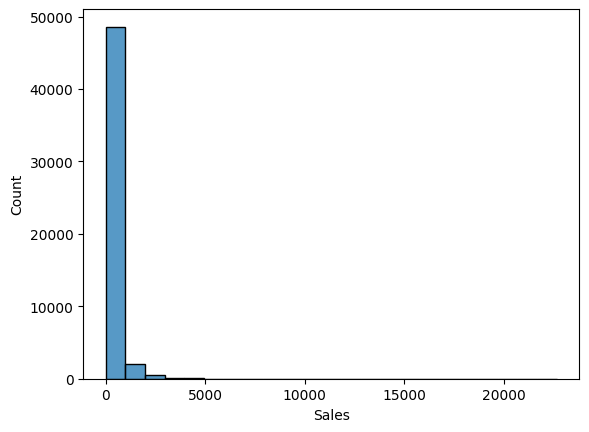

In [30]:
sns.histplot(df['Sales'], binwidth=1000);

The histogram shows us how most of the sales made are in the houndreds. We also see how the max sale is around 20000 so there is a wide range between amounts.

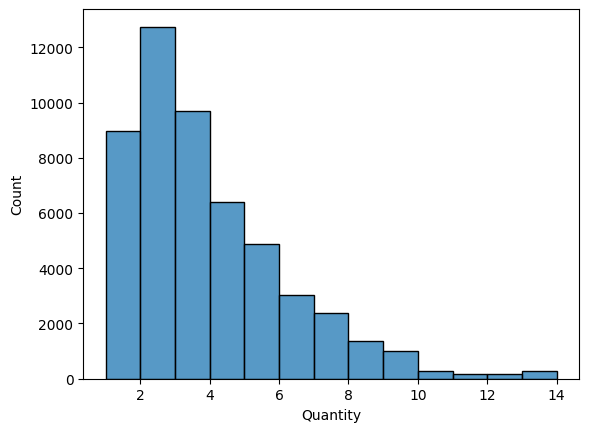

In [31]:
sns.histplot(df['Quantity'], binwidth=1);

This histogram for Quantity shows us how 3 is the most common 'Quantity' and after that it gradually declines as the quantity goes higher, except at the end with 13 that it goes slighty up insted.

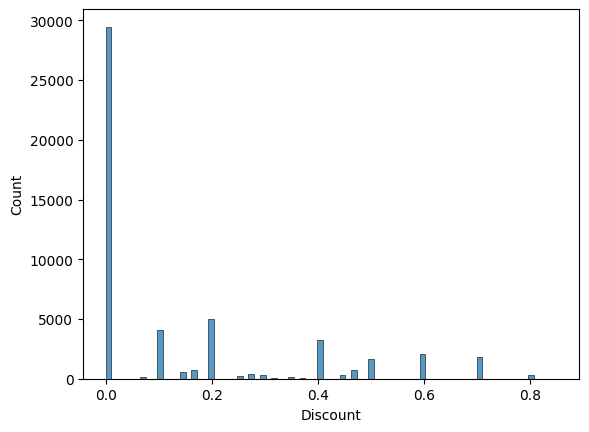

In [32]:
sns.histplot(df['Discount']);

With this histogram we see oh the majority or sales did not have a discount. However, when a discount was added we can see how it was usually round numbers like 20%,40% or 60%, and all  multiples of 2 as well.

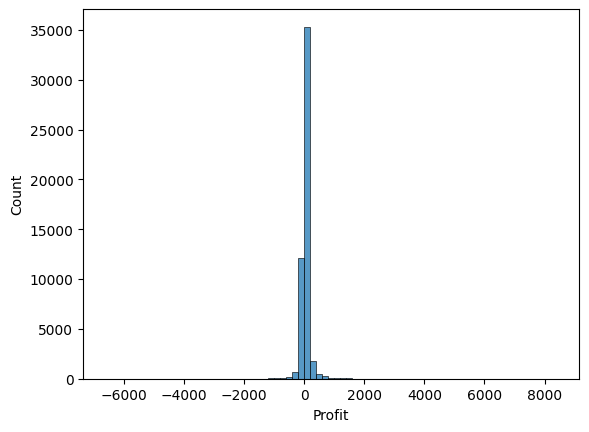

In [33]:
sns.histplot(df['Profit'], binwidth=200);

The profit histogram shows us how the majority had possitive profits but they are not high ones. We can also see that we had a lot with a negative profit.

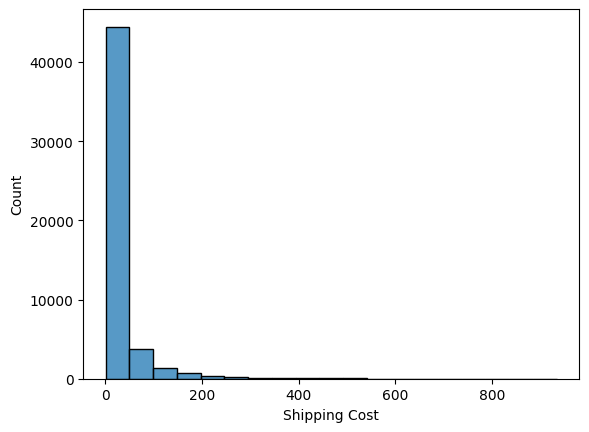

In [34]:
sns.histplot(df['Shipping Cost'], binwidth=50);

The shipping cost goes from 1 dollar to 933 dollars. However, with the histogram we can see how the majority of orders had a shipping cost on the lower range.  



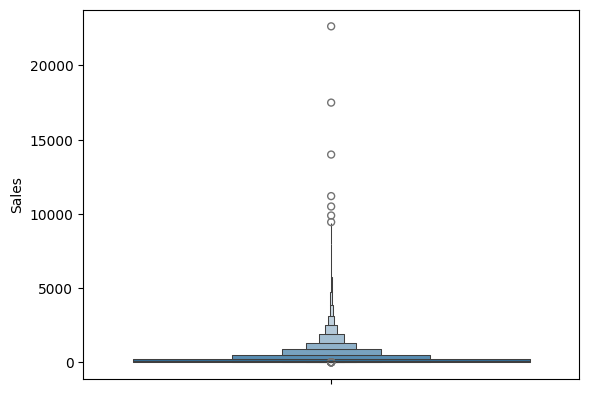

In [35]:
sns.boxenplot(df['Sales']);

Now, with the boxplot we can see better the outliers and how the majority of them are in the higher range of values.

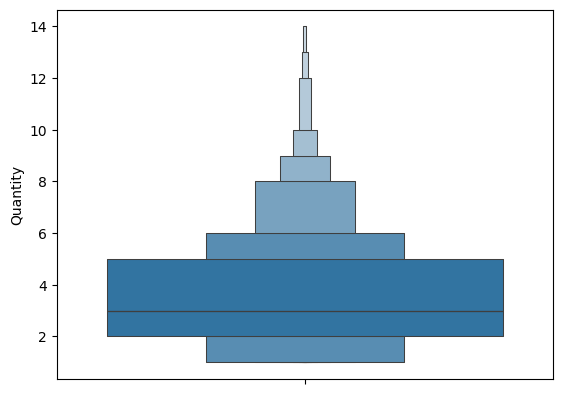

In [36]:
sns.boxenplot(df['Quantity']);

With quantity we see how we don't have any outliers.

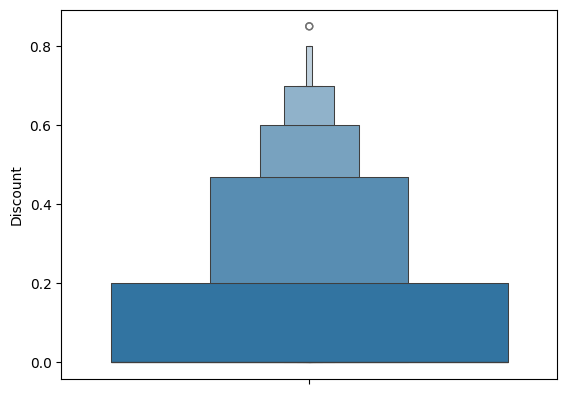

In [37]:
sns.boxenplot(df['Discount']);

The discount boxplot shows us how the discounts were distributed and how we only have one outlier.

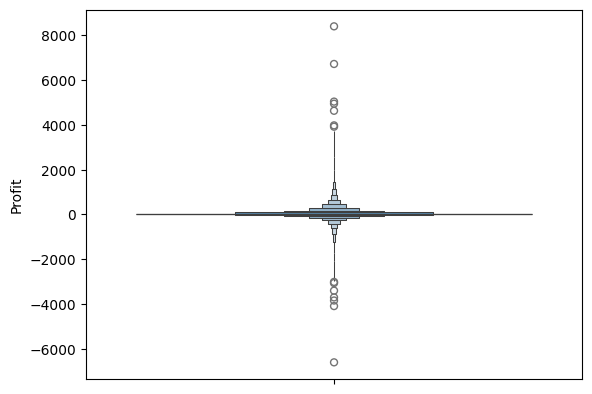

In [38]:
sns.boxenplot(df['Profit']);

With profit we can see how the boxplot is pretty simmetric and we have a lot of outlier on both ends.

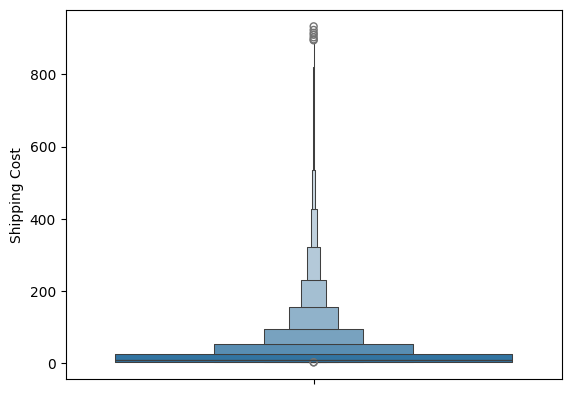

In [39]:
sns.boxenplot(df['Shipping Cost']);

This boxplot shows us Shipping cost, we can see how the quantity of values it gradaully goes as the shipping cost goes up. We can also see some outliers on the end of the range.

##Visualize Categorical Fields: Bar Plots and Horizontal Bar Plots

* Ship Mode
* Segment
* Region
* Market
* Category
* Sub-Category
* Order Priority

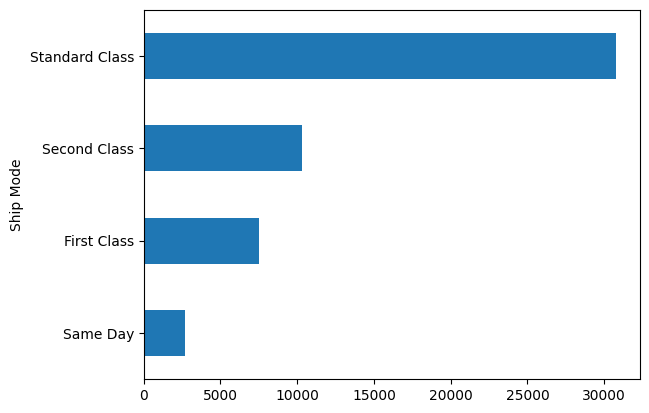

In [40]:
data=df['Ship Mode'].value_counts(ascending=True)
data.plot.barh();

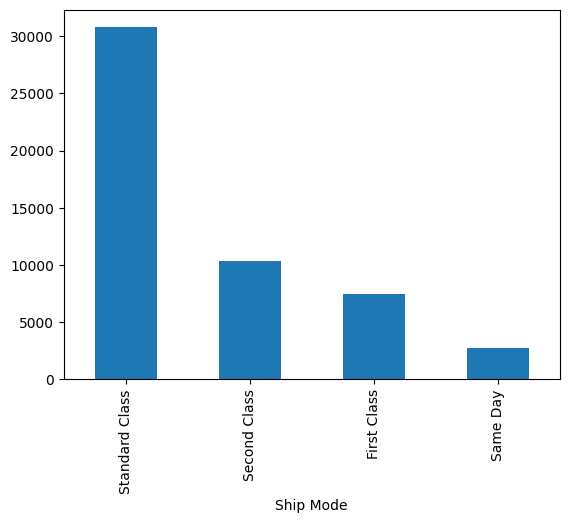

In [41]:
data=df['Ship Mode'].value_counts()
data.plot.bar();

With these charts we can clearly see how the standard class is the most common one with a big difference compared to the others.

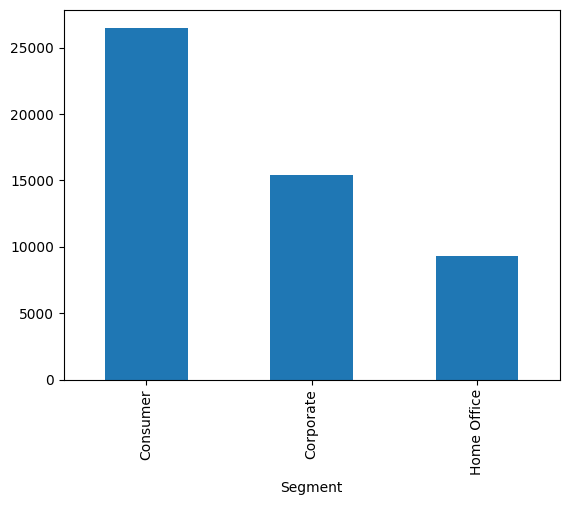

In [42]:
data=df['Segment'].value_counts()
data.plot.bar();

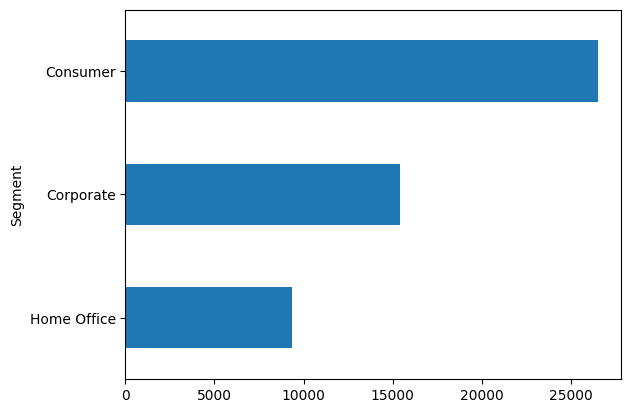

In [43]:
data=df['Segment'].value_counts(ascending=True)
data.plot.barh();

Here we see how consumer is the bigger segment out of the 3.

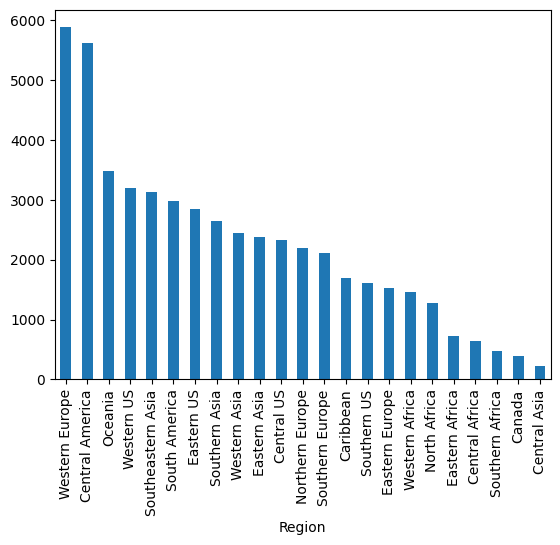

In [44]:
data=df['Region'].value_counts()
data.plot.bar();

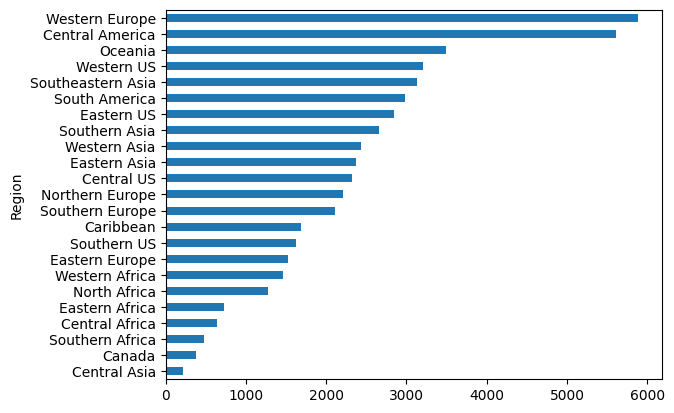

In [45]:
data=df['Region'].value_counts(ascending=True)
data.plot.barh();

Western Europe and Central America are the two biggest regions.

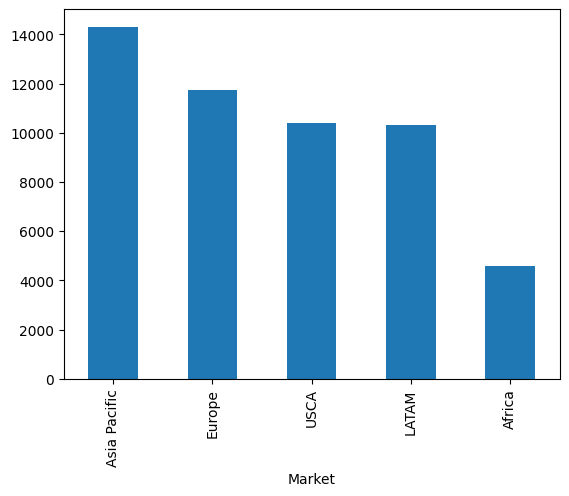

In [46]:
data=df['Market'].value_counts()
data.plot.bar();

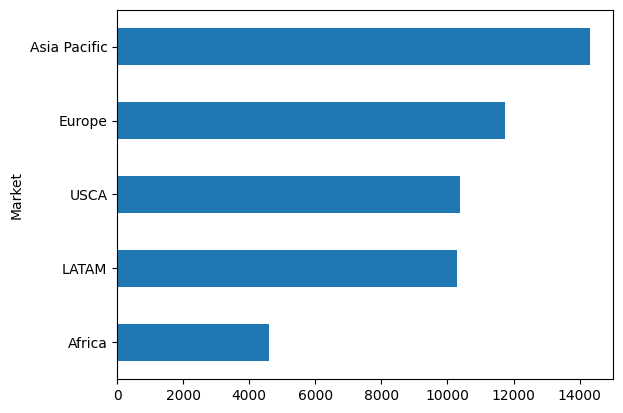

In [47]:
data=df['Market'].value_counts(ascending=True)
data.plot.barh();

The markets are pretty similar, however Asia Pacific is the biggest one and Africa is considerably smaller than the rest.

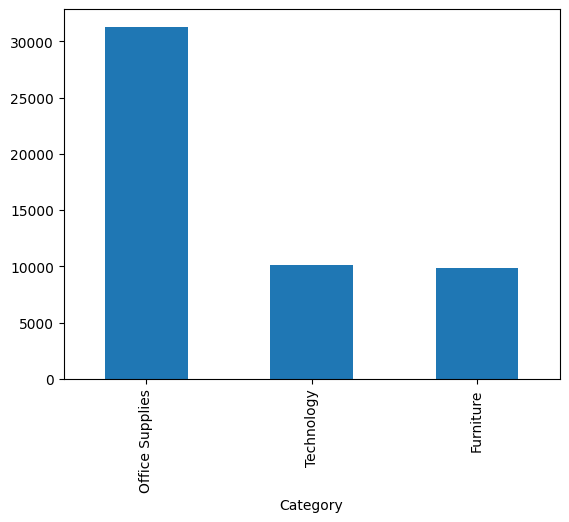

In [48]:
data=df['Category'].value_counts()
data.plot.bar();

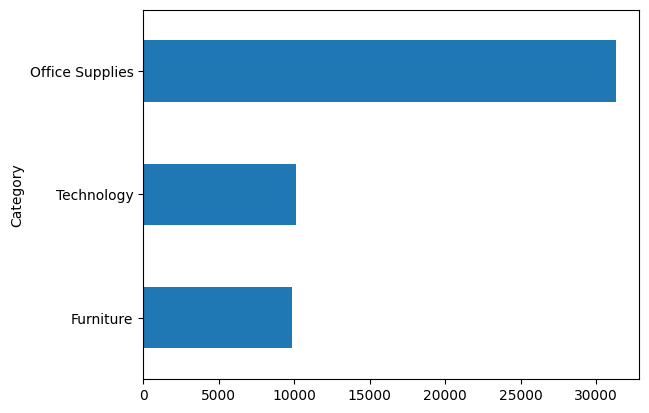

In [49]:
data=df['Category'].value_counts(ascending=True)
data.plot.barh();

We see that the office supplies category is the predominant one out of the 3.

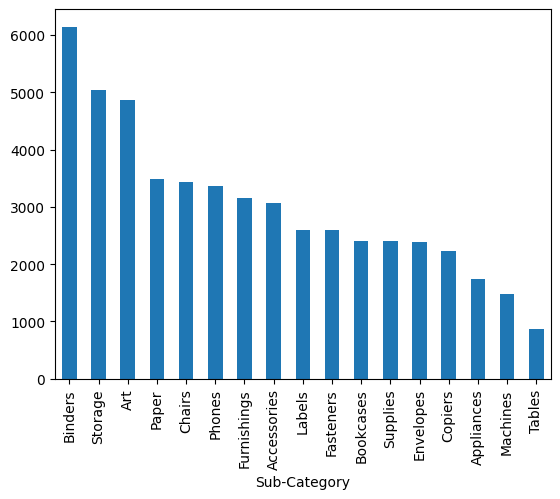

In [50]:
data=df['Sub-Category'].value_counts()
data.plot.bar();

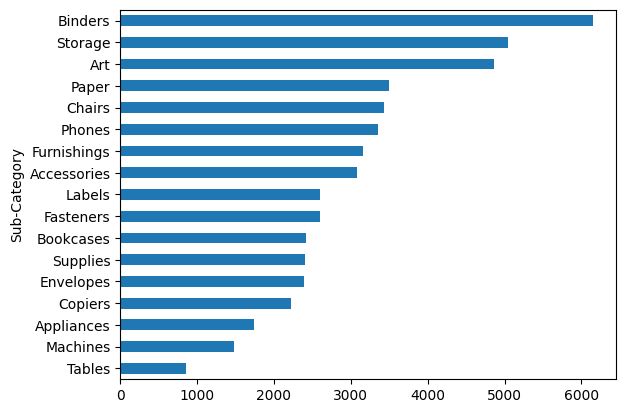

In [51]:
data=df['Sub-Category'].value_counts(ascending=True)
data.plot.barh();

Binders is the most common sub-category while Tables is the lest common.

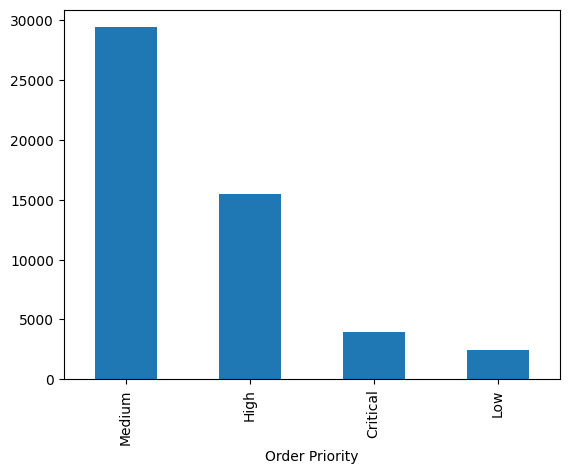

In [52]:
data=df['Order Priority'].value_counts()
data.plot.bar();

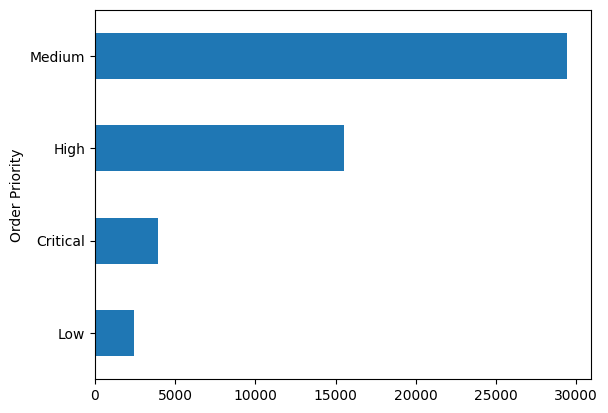

In [53]:
data=df['Order Priority'].value_counts(ascending=True)
data.plot.barh();

The most common order priority is Medium.

##Categorical + Numeric Data

In [54]:
# Total Sales by Segment
df.groupby('Segment')['Sales'].sum()

,Sales
Segment,
Consumer,"6,507,949.42"
Corporate,"3,824,697.52"
Home Office,"2,309,854.97"


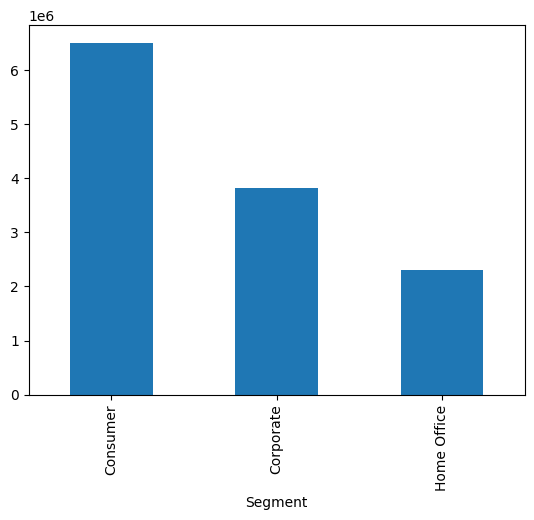

In [55]:
# Total Sales by Segment Bar Chart
data = df.groupby('Segment')['Sales'].sum()
data.plot.bar();

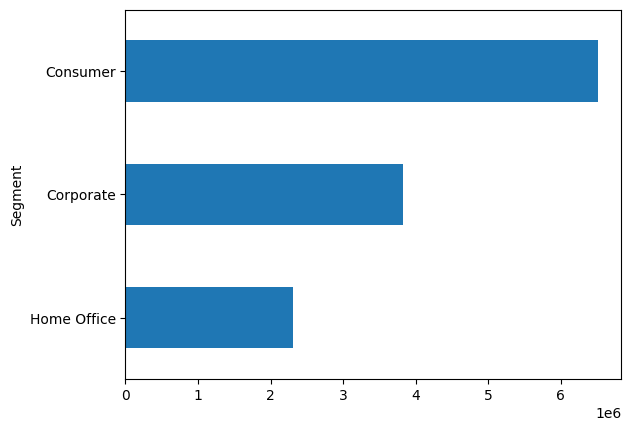

In [56]:
# Total Sales by Segment Bar Chart
data = df.groupby('Segment')['Sales'].sum().sort_values()
data.plot.barh();

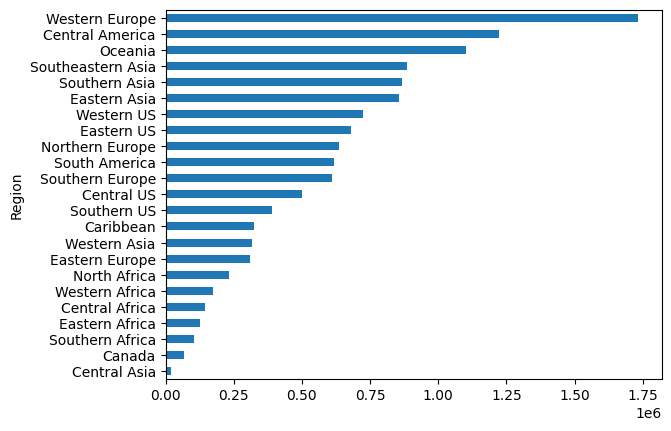

In [57]:
# Total Sales by Region Bar Chart
data = df.groupby('Region')['Sales'].sum().sort_values()
data.plot.barh();

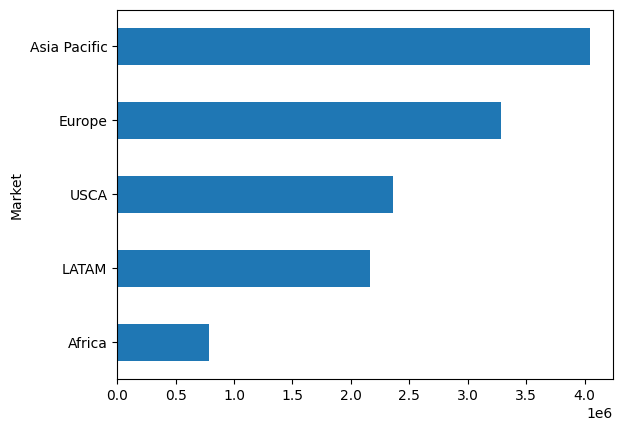

In [58]:
# Total Sales by Market Bar Chart
data = df.groupby('Market')['Sales'].sum().sort_values()
data.plot.barh();

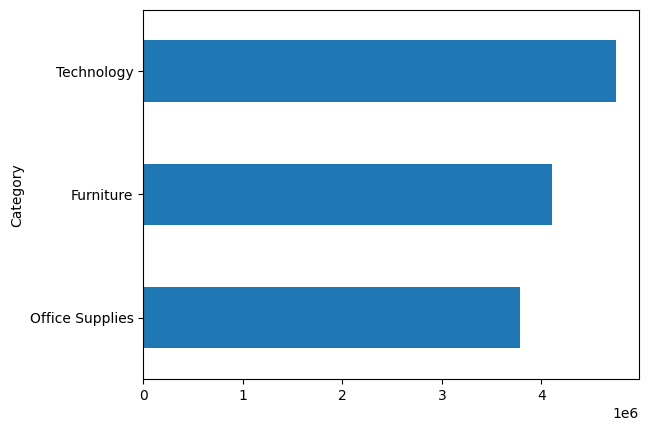

In [59]:
# Total Sales by Category Bar Chart
data = df.groupby('Category')['Sales'].sum().sort_values()
data.plot.barh();

Sub-Category
Phones        1,706,824.14
Copiers       1,509,436.27
Chairs        1,501,681.76
Bookcases     1,466,572.24
Storage       1,126,812.97
Appliances    1,010,535.53
Machines        779,060.07
Tables          757,041.92
Accessories     749,237.02
Binders         461,869.39
Furnishings     385,155.97
Art             371,613.15
Supplies        242,811.13
Paper           241,787.53
Envelopes       169,217.49
Fasteners        89,495.05
Labels           73,350.28
Name: Sales, dtype: float64


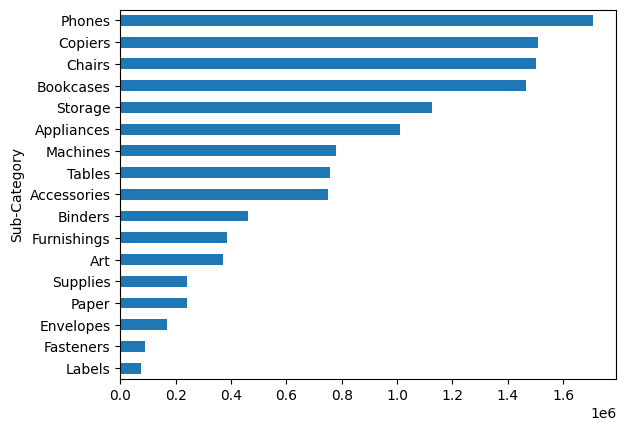

In [60]:
# Total Sales by Sub-Category Bar Chart
rawdata = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending= False)
print(rawdata)
data = df.groupby('Sub-Category')['Sales'].sum().sort_values()
data.plot.barh();

In [61]:
# prompt: set pandas to display numbers without scientific notation

import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)


In [62]:
# Set the desired formatting string(e.g., display 2 decimal places)
pd.options.display.float_format = '{:,.2f}'.format

##Create Dataframes and Line Charts to display Sales by Month and Sales by Quarter

* groupby with dt.to_period
* resample

### Groupby with dt.to_period

In [63]:
# Group sales by month
# creates a new dataframe: monthy_sales
monthy_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthy_sales['Order Date'] = monthy_sales['Order Date'].astype(str) # Convert to string for plotting
monthy_sales.head()

,Order Date,Sales
0,2012-01,"98,898.49"
1,2012-02,"103,717.92"
2,2012-03,"135,746.40"
3,2012-04,"114,332.96"
4,2012-05,"158,228.33"


In [64]:
monthy_sales

,Order Date,Sales
0,2012-01,"98,898.49"
1,2012-02,"103,717.92"
2,2012-03,"135,746.40"
3,2012-04,"114,332.96"
4,2012-05,"158,228.33"
5,2012-06,"207,571.54"
6,2012-07,"118,434.88"
7,2012-08,"208,063.28"
8,2012-09,"284,587.75"
9,2012-10,"216,114.57"


In [65]:
monthy_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  48 non-null     object 
 1   Sales       48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 900.0+ bytes


In [66]:
# Import the necessary library
import matplotlib.pyplot as plt

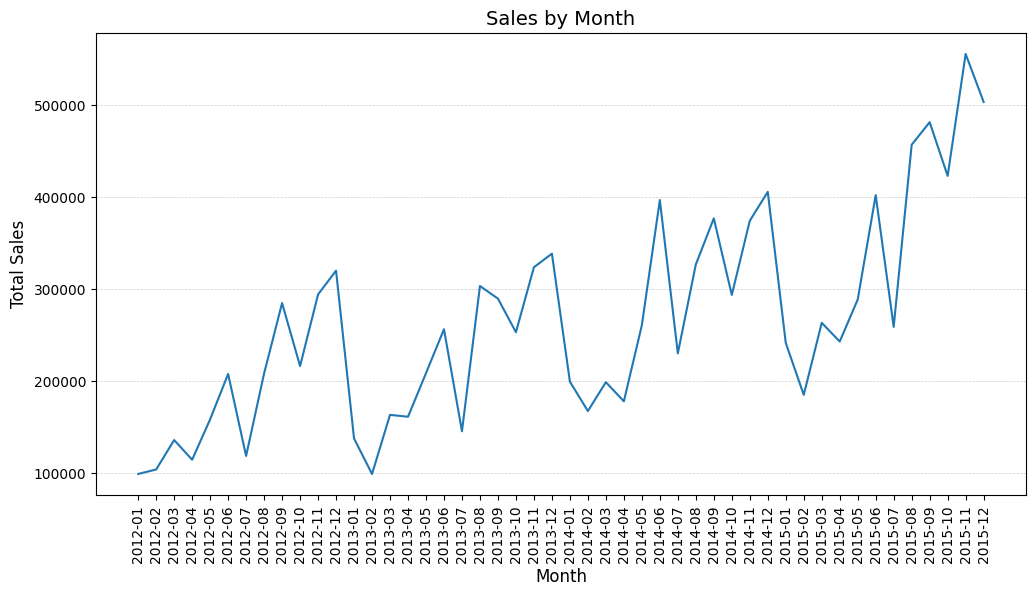

In [67]:
# Plot the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(monthy_sales['Order Date'], monthy_sales['Sales'])

# formatting the plot
plt.title('Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()


In [68]:
# Group sales by quarter
# Group sales by Year and Qaurter
# creates a new dataframe: quarterly_sales
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum().reset_index()
quarterly_sales['Order Date'] = quarterly_sales['Order Date'].astype(str).replace('Q', '-Q') # Convert to string for plotting
quarterly_sales.head(10)

,Order Date,Sales
0,2012Q1,"338,362.81"
1,2012Q2,"480,132.84"
2,2012Q3,"611,085.92"
3,2012Q4,"829,869.33"
4,2013Q1,"399,367.71"
5,2013Q2,"625,592.86"
6,2013Q3,"737,768.89"
7,2013Q4,"914,709.23"
8,2014Q1,"565,019.59"
9,2014Q2,"834,839.49"


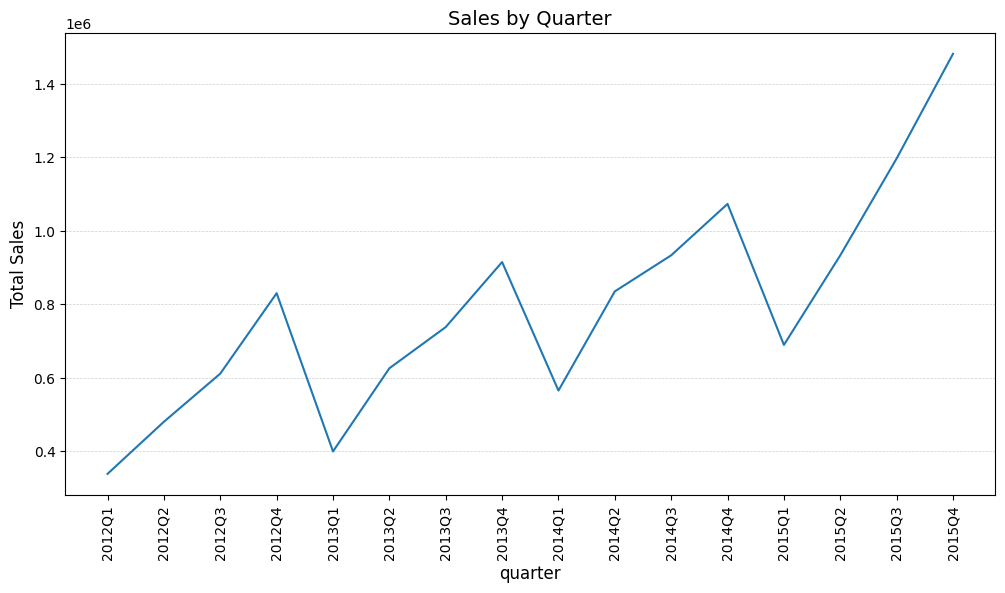

In [69]:
# Display Quarter Sales
# Plot the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales['Order Date'], quarterly_sales['Sales'])

# formatting the plot
plt.title('Sales by Quarter', fontsize=14)
plt.xlabel('quarter', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()

### Resample Method

In [70]:
monthy_sales_rs = df.resample('ME', on='Order Date')['Sales'].sum().reset_index()
monthy_sales_rs.head(30)

,Order Date,Sales
0,2012-01-31,"98,898.49"
1,2012-02-29,"103,717.92"
2,2012-03-31,"135,746.40"
3,2012-04-30,"114,332.96"
4,2012-05-31,"158,228.33"
5,2012-06-30,"207,571.54"
6,2012-07-31,"118,434.88"
7,2012-08-31,"208,063.28"
8,2012-09-30,"284,587.75"
9,2012-10-31,"216,114.57"


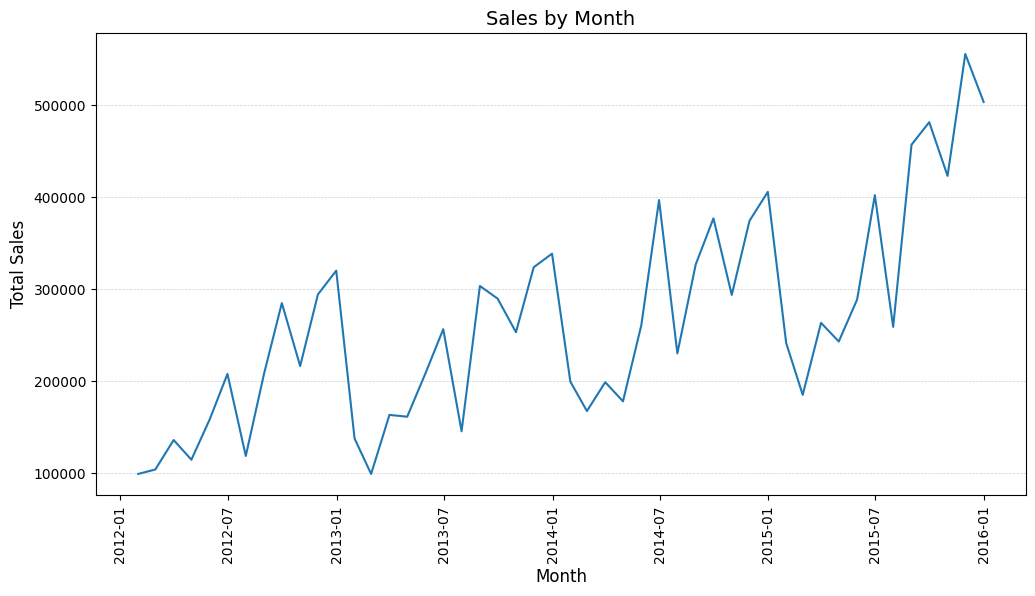

In [71]:
# Plot the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(monthy_sales_rs['Order Date'], monthy_sales_rs['Sales'])

# formatting the plot
plt.title('Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()

In [72]:
quarterly_sales_rs = df.resample('QE', on='Order Date')['Sales'].sum().reset_index()
quarterly_sales_rs.head(30)

,Order Date,Sales
0,2012-03-31,"338,362.81"
1,2012-06-30,"480,132.84"
2,2012-09-30,"611,085.92"
3,2012-12-31,"829,869.33"
4,2013-03-31,"399,367.71"
5,2013-06-30,"625,592.86"
6,2013-09-30,"737,768.89"
7,2013-12-31,"914,709.23"
8,2014-03-31,"565,019.59"
9,2014-06-30,"834,839.49"


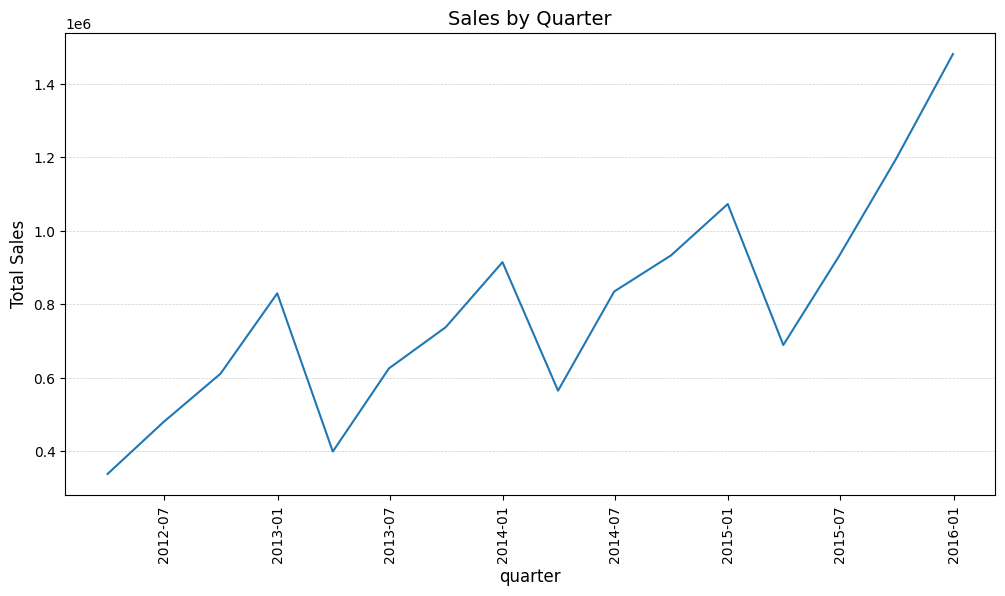

In [73]:
# Display Quarter Sales
# Plot the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales_rs['Order Date'], quarterly_sales_rs['Sales'])

# formatting the plot
plt.title('Sales by Quarter', fontsize=14)
plt.xlabel('quarter', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()

In [74]:
monthly_profit = df.resample('ME', on='Order Date')['Profit'].sum().reset_index()
monthly_profit.head(30)

,Order Date,Profit
0,2012-01-31,"8,321.80"
1,2012-02-29,"14,323.06"
2,2012-03-31,"13,089.63"
3,2012-04-30,"13,211.11"
4,2012-05-31,"14,644.08"
5,2012-06-30,"20,940.60"
6,2012-07-31,"4,040.61"
7,2012-08-31,"26,453.00"
8,2012-09-30,"35,044.52"
9,2012-10-31,"27,597.96"


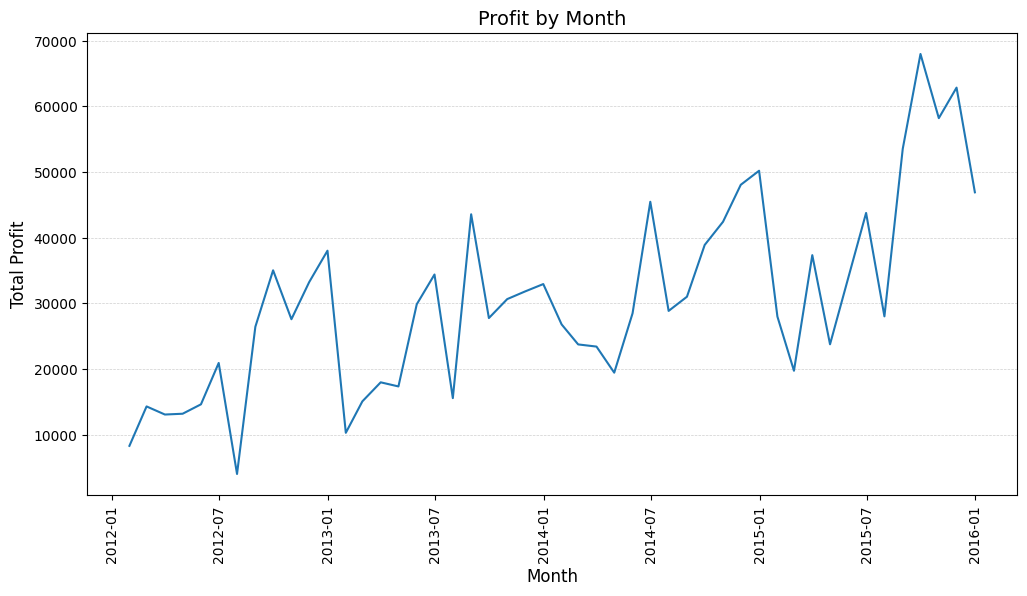

In [75]:
# Plot the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit['Order Date'], monthly_profit['Profit'])

# formatting the plot
plt.title('Profit by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()

In [76]:
quarterly_profit = df.resample('QE', on='Order Date')['Profit'].sum().reset_index()
quarterly_profit.head(30)

,Order Date,Profit
0,2012-03-31,"35,734.49"
1,2012-06-30,"48,795.79"
2,2012-09-30,"65,538.13"
3,2012-12-31,"98,872.40"
4,2013-03-31,"43,394.65"
5,2013-06-30,"81,650.82"
6,2013-09-30,"86,935.45"
7,2013-12-31,"95,434.36"
8,2014-03-31,"74,006.83"
9,2014-06-30,"93,436.15"


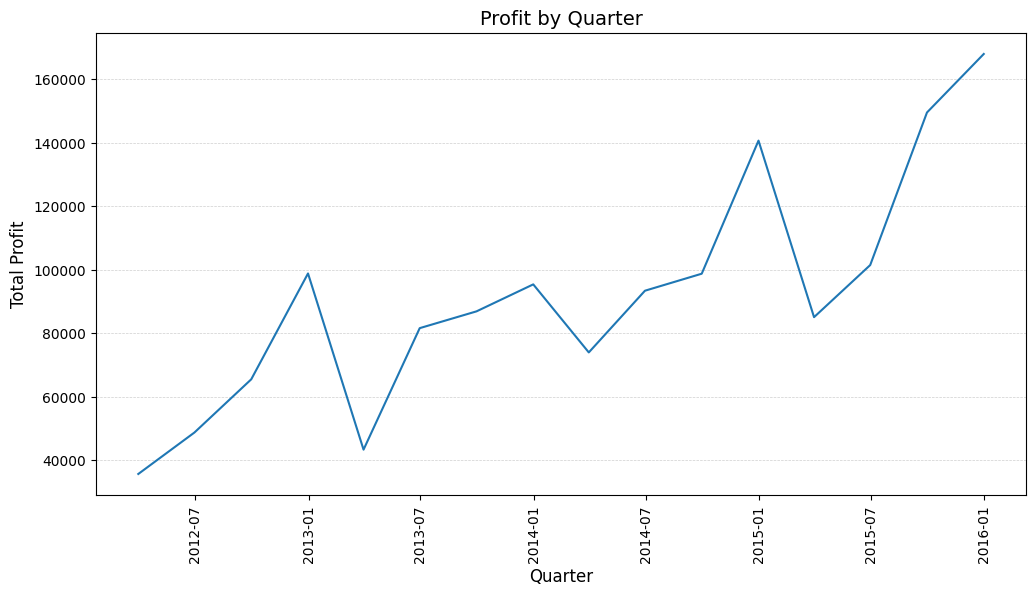

In [77]:
# Plot the line chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(quarterly_profit['Order Date'], quarterly_profit['Profit'])

# formatting the plot
plt.title('Profit by Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()

## Customizations and Innovations##

Add at least 10 new cells with experiments and innovations such as:
* Demonstrate chart style options using Matplotlib and/or Seaborn -- Discover what's possible using AI and the documentation, and create 3-4 variations of charts to demonstrate some of the chart options.
* For instance, you might change the grid, add labels for data points, display data points as dollars, etc.
Experiment with other chart types, such as filled line plots, violin plots (for categorical+numeric data), etc.
* For each type of customization or experiment, include a markdown cell that introduces what you will be doing in the following cells.

### Sales by Category Bar Chart

In [78]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.head()

,Sales
Category,
Furniture,"4,110,451.90"
Office Supplies,"3,787,492.51"
Technology,"4,744,557.50"


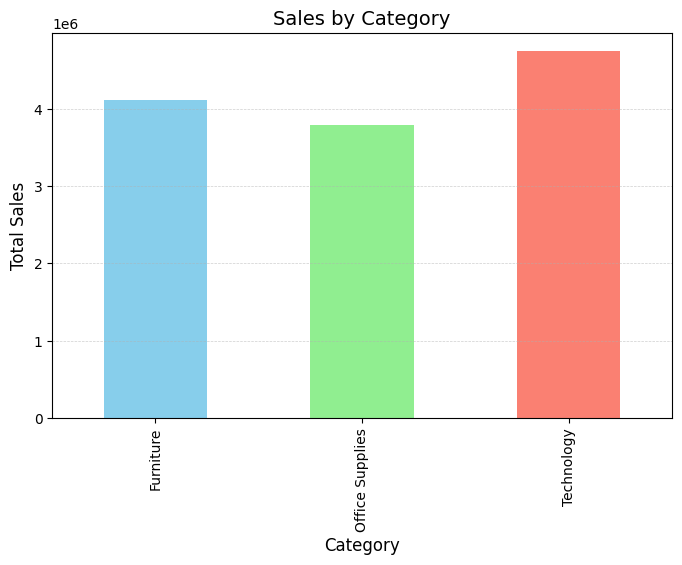

In [79]:
# Plot the bar Chart using Matplotlib
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color=["skyblue", "lightgreen", "salmon"])

# formatting the plot
plt.title('Sales by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

# Show the plot
plt.show()

### Profit vs. Sales Scatter Plot

In [80]:
# Extract Sales and Profit Columns
sales_profit = df[['Sales','Profit']]
sales_profit.head()

,Sales,Profit
0,408.30,106.14
1,120.37,36.04
2,66.12,29.64
3,44.87,-26.06
4,113.67,37.77


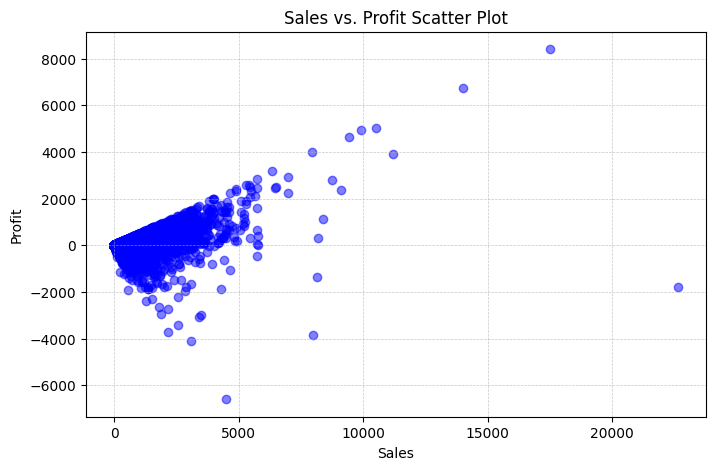

In [81]:
# Plot the Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(df['Sales'], df['Profit'], color='blue', alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs. Profit Scatter Plot')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


### Order Quantity Distribution (Histogram)

In [82]:
quantity_distribution = df["Quantity"]
quantity_distribution.describe()


,Quantity
count,"51,290.00"
mean,3.48
std,2.28
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,14.00


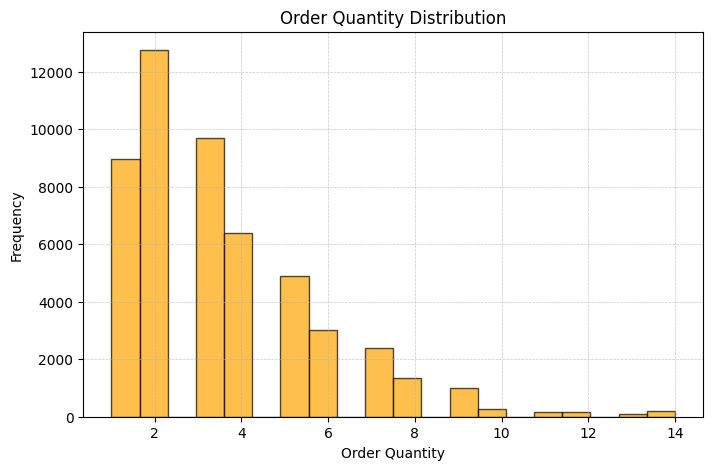

In [83]:
# Extract Quantity Column
quantity_distribution = df["Quantity"]

# Plot
plt.figure(figsize=(8, 5))
plt.hist(quantity_distribution, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Order Quantity Distribution')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

### Top 10 Customers by Sales (Bar Chart)

In [84]:
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10)
top_customers


,Sales
Customer Name,
Tom Ashbrook,"40,488.07"
Tamara Chand,"37,457.33"
Greg Tran,"35,550.95"
Christopher Conant,"35,187.08"
Sean Miller,"35,170.93"
Bart Watters,"32,310.45"
Natalie Fritzler,"31,781.26"
Fred Hopkins,"30,400.67"
Jane Waco,"30,288.45"


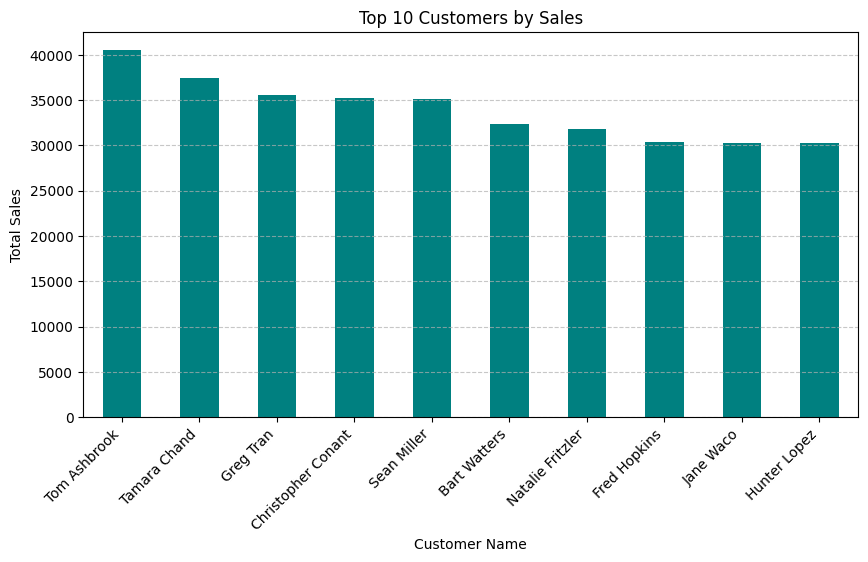

In [85]:
# Plot the bar chart
plt.figure(figsize=(10, 5))
top_customers.plot(kind="bar", color="teal")
plt.xlabel("Customer Name")
plt.ylabel("Total Sales")
plt.title("Top 10 Customers by Sales")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Sales Distribution By Region (Pie Chart)

In [86]:
# Group data by Ship Mode and sum Sales
ship_mode_sales = df.groupby("Ship Mode")["Sales"].sum()
ship_mode_sales

,Sales
Ship Mode,
First Class,"1,830,976.14"
Same Day,"667,201.98"
Second Class,"2,565,671.68"
Standard Class,"7,578,652.11"


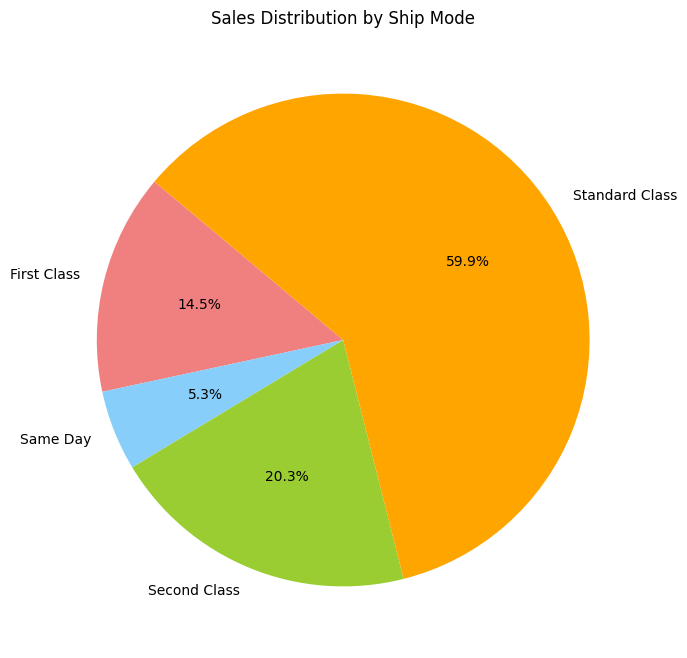

In [87]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
ship_mode_sales.plot(kind="pie", autopct='%1.1f%%', startangle=140,
                     colors=['lightcoral', 'lightskyblue', 'yellowgreen','orange'])
plt.title("Sales Distribution by Ship Mode")
plt.ylabel('')  # Hide the y-label for a cleaner look
plt.show()